#PyTorch Workflow

In [1]:
what_were_covering={1: "data (prepare and load", 
                    2: "build model", 
                    3: "training", 
                    4: "inference", 
                    5: "savinf and loading model", 
                    6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load',
 2: 'build model',
 3: 'training',
 4: 'inference',
 5: 'savinf and loading model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

#Data (preparing and loading)

In [3]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

#Splitting data into training and test sets

In [5]:
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

#visualize better

In [53]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label ="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label ="Test Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

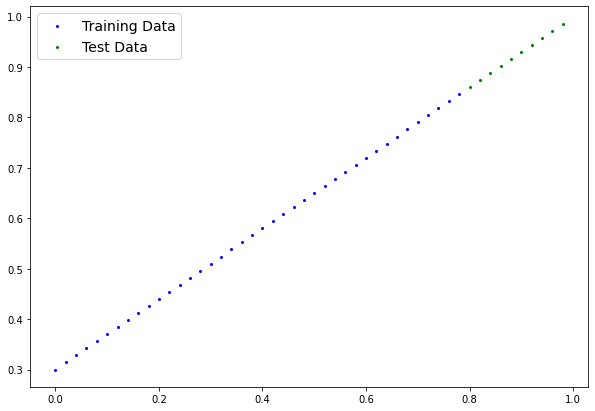

In [54]:
plot_predictions();

#build model

In [55]:
class LinearRegressionModel(nn.Module):  # <- almost everything in　pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, 
                                         requires_grad=True, 
                                         dtype=torch.float))
    
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

#PyTorch model building essentials

* torch.nn - contains all of the builfing for graphs
* torch.nn.Parameter - what parameter should our model try and learn, often a Pytorch layer from torch.nn iwll set these.
* toorch.nn.Module - the base class for all neural network modules
* torch.optim - where the optimizeres in pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [56]:
torch.randn(1)

tensor([1.3554])

#Checking the contents of pytorch model

In [57]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [58]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

#Making predicitons using `torch.inference_mode()`

In [59]:
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds, y_test

(tensor([[0.0677],
         [0.0853],
         [0.1030],
         [0.1206],
         [0.1382],
         [0.1559],
         [0.1735],
         [0.1912],
         [0.2088],
         [0.2265]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

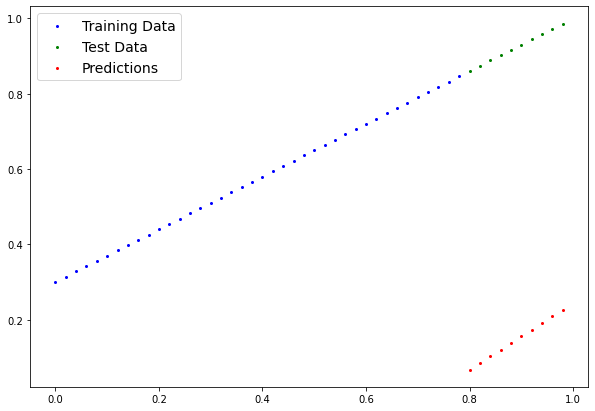

In [60]:
plot_predictions(predictions=y_preds)

#Train Model

One way to measure how poor the prediction, we use the loss function.

* **Loss function: ** A function to measure how wrong the model's prediction are to the ideal outputs, lower the better.
* **Optimizer: ** Takes into account the loss of a model and adjusts the model's parameterees.

In [61]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [62]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [68]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_0.parameters(), 
                          lr=0.01)

#Building a training loop and testing loop in pytorch

training loop:
1. Loop through the data
2. Forward pass
3. Calculate the loss
4. Optimizer zero grad
5. Loss backwards - moves backwards through the network to calculate the gradients
6. Optimizer step - use the optimizer to adjust our models parameters to try and imprive the loss (**gradient descent**)

In [69]:
with torch.no_grad():
  list(model_0.parameters())



In [66]:
#An epoch is one loop through the data
epochs=1

#1.
for epochs in range(epochs):
  model_0.train()

L1Loss()